**Πανος Ντάγκας el18018**
<br>
**Θοδωρής Παπαρρηγόπουλος el18040**

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1α**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει μουσικά κομμάτια σε χρήστες.


Η παράδοση του θέματος θα γίνει μετά το πέρας της καμπάνιας όπου και θα σχηματιστεί το εμπλουτισμένο σύνολο δεδομένων (new_songs.csv). Το μη εμπλουτισμένο σύνολο (songs.csv) σας δίνεται για την εξοικείωσή σας με τις τεχνολογίες που θα χρησιμοποιήσετε.

## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πώς μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο vivaldi.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες.

```xml
<http://example.org/ns/496_MIL0882058> <http://example.org/props/publisher> <http://example.org/ns/Virgin_Classics> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/year> "2011"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/title> "La_Stravaganza"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/496_MIL0882058> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/composer> <http://example.org/ns/Antonio_Vivaldi> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/year> "2010"^^<http://www.w3.org/2001/XMLSchema#date> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/title> "La follia_:_Sonate_per_violino_vivaldi"^^<http://www.w3.org/2001/XMLSchema#string>.
<http://example.org/ns/496_LO11367666> <http://example.org/props/duration> "30073"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/496_LO11367666> <http://example.org/props/publisher> <http://example.org/ns/Sony_Music_Entertainment> .
```
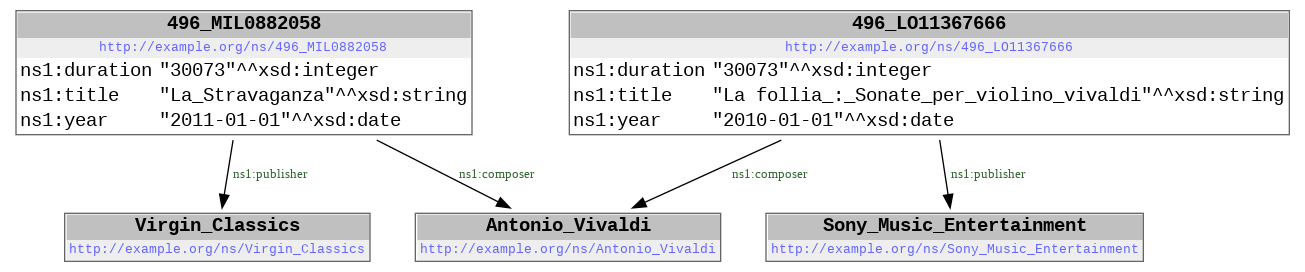

Ο γράφος αυτός περιέχει πληροφορίες για δύο μουσικά κομμάτια, την δισκογραφική που τα κυκλοφόρησε και τον συνθέτη τους. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [1]:
%pip install rdflib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from rdflib import Graph, Literal, URIRef, Namespace
## Αρχικοποίηση ενός κενού γράφου
g = Graph() 

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('vivaldi.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
g.print()
for node in g.all_nodes():
  print(node)


All nodes of the graph:
@prefix ns1: <http://example.org/props/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/ns/496_LO11367666> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Sony_Music_Entertainment> ;
    ns1:title "La follia_:_Sonate_per_violino_vivaldi"^^xsd:string ;
    ns1:year "2010-01-01"^^xsd:date .

<http://example.org/ns/496_MIL0882058> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Virgin_Classics> ;
    ns1:title "La_Stravaganza"^^xsd:string ;
    ns1:year "2011-01-01"^^xsd:date .


2010-01-01
30073
La_Stravaganza
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Antonio_Vivaldi
La follia_:_Sonate_per_violino_vivaldi
http://example.org/ns/496_LO11367666
http://example.org/ns/Virgin_Classics
http://example.org/ns/496_MIL0882058
2011-01-01


Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Ποια μουσικά κομμάτια έχει συνθέσει ο Antonio Vivaldi?

In [3]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
          ?song exp:title ?title
       }""")
for a in ans:
  print(a)  

(rdflib.term.Literal('La_Stravaganza', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Antonio Vivaldi γεννήθηκε το 1678-03-04.

In [4]:
from rdflib.namespace import XSD
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI του συνθέτη
a = URIRef(ns1+"Antonio_Vivaldi")

## URI της ιδιότητας "ημερομηνία γέννησης"
b = URIRef(ns2+"date_of_birth")

## URI της ημερομηνίας γέννησης
c = Literal("1678-03-04", datatype = XSD.date)
## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
g.print()
for node in g.all_nodes():
  print(node)

All nodes of the graph:
@prefix ns1: <http://example.org/props/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/ns/496_LO11367666> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Sony_Music_Entertainment> ;
    ns1:title "La follia_:_Sonate_per_violino_vivaldi"^^xsd:string ;
    ns1:year "2010-01-01"^^xsd:date .

<http://example.org/ns/496_MIL0882058> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Virgin_Classics> ;
    ns1:title "La_Stravaganza"^^xsd:string ;
    ns1:year "2011-01-01"^^xsd:date .

<http://example.org/ns/Antonio_Vivaldi> ns1:date_of_birth "1678-03-04"^^xsd:date .


1678-03-04
2010-01-01
30073
La_Stravaganza
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Antonio_Vivaldi
La follia_:_Sonate_per_violino_vivaldi
http://example.org/ns/496_LO11367666
http://example.org/ns/Virgin_Clas

Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα του κομματιού έχει URI <<http://example.org/ns/496_MIL0882058>> και όχι <<http://example.org/ns/La_Stravaganza>>. Ο τίτλος ενός μουσικού κομματιού είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [5]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?song
       WHERE {
          ?song exp:title "La_Stravaganza"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/496_MIL0882058'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο αρχείο songs.csv, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο μουσικά κομμάτια διαφορετικά από αυτά που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας συνθέτης ή μια δισκογραφική) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο vivaldi.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

**Προσοχή:** Τα κενά και ορισμένοι ειδικοί χαρακτήρες ('/') ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.

In [6]:
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g2 = Graph()

## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI του κομματιού
a = URIRef(ns1+"446_UBO3950831")

## URI της ιδιότητας "έχει συνθέτη"
b = URIRef(ns2+"composer")

## URI του Nino Rota
c = URIRef(ns1+"Nino_Rota")

## Προσθήκη της τριάδας a,b,c στο γράφο
g2.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
1678-03-04
2010-01-01
30073
La_Stravaganza
http://example.org/ns/Sony_Music_Entertainment
http://example.org/ns/Antonio_Vivaldi
La follia_:_Sonate_per_violino_vivaldi
http://example.org/ns/496_LO11367666
http://example.org/ns/Virgin_Classics
http://example.org/ns/496_MIL0882058
2011-01-01


In [7]:
a = URIRef(ns1+"446_UBO3950831")
b = URIRef(ns2+"title")
c = Literal("Il_gattopardo", datatype = XSD.string)
g2.add((a,b,c))


a = URIRef(ns1+"446_UBO3950831")
b = URIRef(ns2+"year")
c = Literal("2012", datatype = XSD.date)
g2.add((a,b,c))

a = URIRef(ns1+"446_UBO3950831")
b = URIRef(ns2+"duration")
c = Literal("30073", datatype = XSD.integer)
g2.add((a,b,c))

a = URIRef(ns1+"446_UBO3950831")
b = URIRef(ns2+"publisher")
c = URIRef(ns1 + "Warner_Music")
g2.add((a,b,c))

a = URIRef(ns1+"9200369_webclient_DeliveryManager_pid_7871906_custom_att_2_simple_viewer")
b = URIRef(ns2+"composer")
c = URIRef(ns1+"Claudio_Monteverdi")
g2.add((a,b,c))

a = URIRef(ns1+ "Claudio_Monteverdi")
b = URIRef(ns2+ "date_of_birth")
c = Literal("1567-05-15",  datatype = XSD.date)
g2.add((a,b,c))

a = URIRef(ns1+ "Claudio_Monteverdi")
b = URIRef(ns2+ "date_of_death")
c = Literal("1643-11-29",  datatype = XSD.date)
g2.add((a,b,c)) 

<Graph identifier=N6a393efee46741b4876038f353810913 (<class 'rdflib.graph.Graph'>)>

In [8]:
# 90,496/TSA1398198,Italian Concertos,2010,30073,Antonio Vivaldi,,,,Emi Classics,
a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "composer")
c = URIRef(ns1 + "Antonio_Vivaldi")
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "title")
c = Literal("Italian_Concertos", datatype = XSD.string) 
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "year")
c = Literal("2010", datatype = XSD.date)
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "duration")
c = Literal("30073", datatype = XSD.integer)
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "publisher")
c = URIRef(ns1 + "Emi_Classics") 
g2.add((a,b,c))

<Graph identifier=N6a393efee46741b4876038f353810913 (<class 'rdflib.graph.Graph'>)>

In [9]:
# 290,496/MIL0875136,Il Progetto Vivaldi ,2011,30073,Antonio Vivaldi,,,,Sony Music Entertainment,
a = URIRef(ns1 + "496_MIL0875136")
b = URIRef(ns2 + "composer")
c = URIRef(ns1 + "Antonio_Vivaldi")
g2.add((a,b,c))

a = URIRef(ns1 + "496_MIL0875136")
b = URIRef(ns2 + "title")
c = Literal("Il_Progetto_Vivaldi", datatype = XSD.string) 
g2.add((a,b,c))

a = URIRef(ns1 + "496_MIL0875136")
b = URIRef(ns2 + "year")
c = Literal("2011", datatype = XSD.date)
g2.add((a,b,c))

a = URIRef(ns1 + "496_MIL0875136")
b = URIRef(ns2 + "duration")
c = Literal("30073", datatype = XSD.integer)
g2.add((a,b,c))

a = URIRef(ns1 + "496_MIL0875136")
b = URIRef(ns2 + "publisher")
c = URIRef(ns1 + "Sony_Music_Entertainment") 
g2.add((a,b,c))

<Graph identifier=N6a393efee46741b4876038f353810913 (<class 'rdflib.graph.Graph'>)>

In [10]:
g2.print() 
g2.serialize(destination='mygraph.nt', format='nt')

@prefix ns1: <http://example.org/props/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/ns/446_UBO3950831> ns1:composer <http://example.org/ns/Nino_Rota> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Warner_Music> ;
    ns1:title "Il_gattopardo"^^xsd:string ;
    ns1:year "2012-01-01"^^xsd:date .

<http://example.org/ns/496_MIL0875136> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Sony_Music_Entertainment> ;
    ns1:title "Il_Progetto_Vivaldi"^^xsd:string ;
    ns1:year "2011-01-01"^^xsd:date .

<http://example.org/ns/496_TSA1398198> ns1:composer <http://example.org/ns/Antonio_Vivaldi> ;
    ns1:duration 30073 ;
    ns1:publisher <http://example.org/ns/Emi_Classics> ;
    ns1:title "Italian_Concertos"^^xsd:string ;
    ns1:year "2010-01-01"^^xsd:date .

<http://example.org/ns/9200369_webclient_DeliveryManager_pid_7871906_custom_att_2_simple_viewer> ns1:composer <h

/home/thodoris/.local/lib/python3.8/site-packages/rdflib/plugins/serializers/nt.py:36: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  warnings.warn(


<Graph identifier=N6a393efee46741b4876038f353810913 (<class 'rdflib.graph.Graph'>)>

### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, vivaldi.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('vivaldi.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [11]:
## Απάντηση 1.2
g = Graph() 
g.parse('vivaldi.nt',format='nt')
g.parse('mygraph.nt',format='nt')

ans = g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?song exp:composer ex:Antonio_Vivaldi .
          ?song exp:title ?title 
       }""")
for a in ans:
  print(a)


(rdflib.term.Literal('La_Stravaganza', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('La follia_:_Sonate_per_violino_vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('Il_Progetto_Vivaldi', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('Italian_Concertos', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


## 2o Μέρος: Ανάπτυξη γράφου γνώσης





Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο songs.csv που σας δίνεται
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

Εδώ να σημειώσουμε ξανά ότι θα σας δοθεί σε δεύτερο χρόνο το εμπλουτισμένο αρχείο new_songs.csv το οποίο θα προκύψει από τη διαδικασία crowdsourcing του θέματος 1β. Με βάση αυτό το αρχείο θα πρέπει να παραδώσετε το τελικό σας θέμα.

In [12]:
import pandas as pd
df = pd.read_csv('new_songs.csv').drop("Unnamed: 0", axis=1)
df.head()

,Europeana ID,Title,Genres,Emotions,Instruments,Year,Duration,Composer,DateOfBirth,DateOfDeath,Biography,Publisher,Place
0,2059210/data_sounds_http___archive_org_downloa...,Selling the Cool Car For You,"Rock, Country","Joy, Calmness","Drums, Electric Guitar",2012,237819,Mick Thomas,1960-02-07,NaN,"Michael James Thomas (born 7 February 1960, Ya...",NaN,Australia
1,9200369/webclient_DeliveryManager_pid_7649526_...,I vespri siciliani,"Opera, Classical","Arousal, Joy",Orchestra,2007,30000,Giuseppe Verdi,1813-10-10,1901-01-27,Giuseppe Fortunino Francesco Verdi (9 or 10 Oc...,Testament,Britain
2,446/MIL0869097,Set me free : ten years after,"Rock, Country","Arousal, Pleasure","Electric Guitar, Drums, Bass",2010,30073,Max Iannantuono,NaN,NaN,NaN,Edel,NaN
3,496/MOD1575994,Sulla strada,Rock,"Arousal, Joy","Electric Guitar, Drums",2009,30073,Massimo Priviero,NaN,NaN,NaN,Universal Music,NaN
4,9200369/webclient_DeliveryManager_pid_9796872_...,Verklarte Nacht op. 4 ; Pelleas und Melisande ...,"Instrumental, Classical","Calmness, Sadness",Orchestra,1998,30049,Arnold Schönberg,NaN,NaN,NaN,Deutsche Grammophon,Berlin


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'composer'):
```python
composer = df['Composer'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη μουσικών κομματιών και συνθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  song = df['Title'][i]
  composer = df['Composer'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε κομμάτια που περιέχουν το EMI Classics στις δισκογραφικές:

```python
df_EMI = df[df['publisher'].str.contains('EMI Classics')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλα τα μουσικά κομμάτια και με όλες τις πληροφορίες που υπάρχουν στο αρχείο songs.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις. Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ("/", " ' ") ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   

In [13]:
# Απάντηση 2.1
## Read csv and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD
import numpy as np 
import datetime

g1 = Graph() # new Graph

songs = pd.read_csv('new_songs.csv').drop("Unnamed: 0", axis=1)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

# ,Europeana ID,Title,Genres,Emotions,Instruments,Year,Duration,Composer,DateOfBirth,DateOfDeath,Biography,Publisher,Place

def filterUriString(string):
  if not isinstance(string, str):
    return ""

  return string.replace('/','_').replace(' ','_').replace(':','_').replace(';','_')

def getListFromString(string):
  if isinstance(string, str):
    l = [filterUriString(song) for song in string.split(', ')]
  else:
    l = [] 

  return l

def insertLiteralGraph(g, items,debug=False):  
  if len(items) == 3:
    if items[2].value is None:
      return
    
    if (isinstance(items[2].value, str) and len(items[2].value) > 0) or isinstance(items[2].value, datetime.date): 
      g.add(items)

def insertUriGraph(g, items, string): 
  if len(items) == 3: 
    if isinstance(string, str) and len(string) > 0:
      g.add(items)

distinct_composers = {}
dateOfBirthObj = {}
dateOfDeathObj = {}
biographyObj = {}

for i in range(songs.shape[0]):
  song_id = filterUriString(songs['Europeana ID'][i])
  title = filterUriString(songs['Title'][i])

  genres = getListFromString(songs['Genres'][i])
  emotions = getListFromString(songs['Emotions'][i])
  instruments = getListFromString(songs['Instruments'][i])

  year = songs['Year'][i]
  duration = songs['Duration'][i] 

  composer = filterUriString(songs['Composer'][i])
  dateOfDeath = filterUriString(songs['DateOfDeath'][i])
  dateOfBirth = filterUriString(songs['DateOfBirth'][i])

  biography = filterUriString(songs['Biography'][i])
  publisher = filterUriString(songs['Publisher'][i])
  place = filterUriString(songs['Place'][i])

  # print(title, emotions, instruments, genres, year, duration, composer, dateOfBirth, dateOfDeath, biography, publisher, place)

  if composer not in distinct_composers:
    distinct_composers[composer] = composer

  insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'hasTitle'), Literal(title, datatype=XSD.string)])
  [insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'hasGenre'), Literal(genre, datatype=XSD.string)]) for genre in genres]
  [insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'createEmotion'), Literal(emotion, datatype=XSD.string)]) for emotion in emotions]
  [insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'hasInstrument'), Literal(instrument, datatype=XSD.string)]) for instrument in instruments]

  insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'year'), Literal(str(year), datatype=XSD.integer)])
  insertLiteralGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'duration'), Literal(str(duration), datatype=XSD.integer)])
  
  insertUriGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'composer'), URIRef(ns1 + composer)], composer)

  if composer not in dateOfBirthObj:
    dateOfBirthObj[composer] = dateOfBirth
  
  if composer not in dateOfDeathObj:
    dateOfDeathObj[composer] = dateOfDeath 
  
  if composer not in biographyObj:
    biographyObj[composer] = biography

  insertUriGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'publisher'), URIRef(ns1 + publisher)], publisher)
  insertUriGraph(g1, [URIRef(ns1+song_id), URIRef(ns2+'place'), URIRef(ns1 + place)], place) 

for composer in distinct_composers:  
  insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'composerName'), Literal(composer, datatype=XSD.string)])

  if composer in dateOfBirthObj:
    # print([URIRef(ns1+composer), URIRef(ns2+'dateOfBirth'), Literal(dateOfBirthObj[composer], datatype=XSD.date)])
    insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'dateOfBirth'), Literal(dateOfBirthObj[composer], datatype=XSD.date)], True)

  if composer in dateOfDeathObj:
    insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'dateOfDeath'), Literal(dateOfDeathObj[composer], datatype=XSD.date)])

  if composer in biographyObj:
    insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'biography'), Literal(biographyObj[composer], datatype=XSD.string)])

In [14]:
# g1.print()
g1.serialize(destination='ask2_1.nt', format='nt')

/home/thodoris/.local/lib/python3.8/site-packages/rdflib/plugins/serializers/nt.py:36: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  warnings.warn(


<Graph identifier=N0553723fb6db47cdb7878a1c49de2494 (<class 'rdflib.graph.Graph'>)>

### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Wolfgang Amadeus Mozart". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [15]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Wolfgang Amadeus Mozart\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})


Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [16]:
data = r.json()
print(data)
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

{'head': {'vars': ['uri']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q254'}}]}}
1
http://www.wikidata.org/entity/Q254


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "Giuseppe Verdi".

In [17]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [18]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

12
http://www.wikidata.org/entity/Q3771609
http://www.wikidata.org/entity/Q7317
http://www.wikidata.org/entity/Q1768473
http://www.wikidata.org/entity/Q3771608
http://www.wikidata.org/entity/Q3771610
http://www.wikidata.org/entity/Q52808313
http://www.wikidata.org/entity/Q52824268
http://www.wikidata.org/entity/Q52831519
http://www.wikidata.org/entity/Q52832471
http://www.wikidata.org/entity/Q52856219
http://www.wikidata.org/entity/Q52942600
http://www.wikidata.org/entity/Q52989468


#### 2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Wolfgang Amadeus Mozart και Giuseppe Verdi αντίστοιχα;  

Απάντηση 2.2.1: Του Mozart επιστρέφει μόνο το uri με το πρόσωπο Wolfgang Amadeus Mozart. Αντίθετα, με τον Verdi επιστρέφει πολλά αποτελέσματα, όπως για τον συνθέτη, για τη μουσική για ταινίας και άλλα. 

#### 2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του  συνθέτη Wolfgang Amadeus Mozart το παραπάνω query σύμφωνα με το label είναι αρκετό; Για την περίπτωση του συνθέτη Giuseppe Verdi;  
 

Απάντηση 2.2.2: Στον mozart από την στιγμή που μας επιστρέφει μόνο 1 αποτέλεσμα είναι αρκετό, αλλά για τον Verdi δεν είναι αρκετό, χρειάζεται να προσθέσουμε στο query την ιδιότητα instance of human. 

#### 2.2.3 Από τη σελίδα των wikidata για τον συνθέτη Giuseppe Verdi μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; Δώστε τουλάχιστον δύο (2) παραδείγματα. 

Απάντηση 2.2.3: <br>
1) instance of human <br>
2) Υπάρχουν πολλές ιδιότητες όπως occupation:composer

#### Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "μουσικό είδος" (music genre) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q188451) και έχει αναγνωριστικό Q188451.  
Έτσι εάν ψάχνουμε την οντότητα του μουσικού είδους "opera" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) μουσικά είδη. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*

In [19]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [20]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

3
http://www.wikidata.org/entity/Q1344
http://www.wikidata.org/entity/Q1592769
http://www.wikidata.org/entity/Q3354534


In [21]:
# More "complex" query by label and "instance of"

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"opera\"@en .
            ?uri wdt:P31 wd:Q188451.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [22]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


1
http://www.wikidata.org/entity/Q1344


Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

#### 2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του συνθέτη Giuseppe Verdi. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [23]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en .
            ?uri wdt:P31 wd:Q5
            }"""  
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

In [24]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel \"Giuseppe Fortunino Francesco Verdi\"@en. 
            ?uri skos:prefLabel|rdfs:label \"Giuseppe Verdi\"@en. 
            }"""  
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7317


#### 2.2.6 Βρείτε την έννοια του συνθέτη Igor Stravinsky στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6: https://www.wikidata.org/wiki/Q7314

##### **Hint:** 

https://lmgtfy.app/?q=igor+stravinsky+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του συνθέτη Igor Stravinsky) μέσω του ονόματός του (label). 


In [25]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en.  
            }"""  
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

4
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q47510844
http://www.wikidata.org/entity/Q64157680
http://www.wikidata.org/entity/Q79946813


#### 2.2.8 Το ερώτημα που σχηματίσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8:

Οχι, επιστρέφει πολλά αποτελέσματα. <br>

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:

In [26]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en. 
            ?uri wdt:P31 wd:Q5
            }"""  
            
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Giuseppe Verdi και Wolfgang Amadeus Mozart); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:

In [27]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel \"Igor Fyodorovich Stravinsky\"@en.
            ?uri skos:prefLabel|rdfs:label \"Igor Stravinsky\"@en. 
            }"""  
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του συνθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q36834) και έχει αναγνωριστικό Q36834. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται εδώ με αναγνωριστικό P27. Η χώρα "Γαλλία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q142) με αναγνωριστικό Q142. Η ιδιότητα "έχει συνθέσει" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P86) με αναγνωριστκό P86. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Grammy περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q41254) με αναγνωριστικό Q41254.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους συνθέτες που έχουν γαλλική υπηκοότητα οι οποίοι να έχουν κερδίσει βραβείο Grammy (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**



Απάντηση 2.2.11:

In [28]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT DISTINCT ?uri
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?x .
            ?x wdt:P361 wd:Q41254.
            }
          """
            # grammy & composer & french       
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

6
http://www.wikidata.org/entity/Q206244
http://www.wikidata.org/entity/Q471656
http://www.wikidata.org/entity/Q7314
http://www.wikidata.org/entity/Q231276
http://www.wikidata.org/entity/Q105487
http://www.wikidata.org/entity/Q313362


#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των συνθετών. 

In [29]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT (count(distinct ?uri) as ?count)
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?x .
            ?x wdt:P361 wd:Q41254.
            }
          """
            # grammy & composer & french       
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
 
size = r.json()["results"]["bindings"][0]["count"]["value"] 
print(f"Returns {size} results")


Returns 6 results


##### **Hint 1**:  

COUNT

##### **Hint 2:**

 Η απάντηση είναι 6. 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13 Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τους τίτλους** των βραβείων Grammy.

In [30]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT DISTINCT ?label
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?grammy .
            ?grammy wdt:P361 wd:Q41254.
            ?grammy rdfs:label ?label . 
            FILTER (lang(?label) = 'en') 
          }
          """ 
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print("There are ", len(data["results"]["bindings"]), " distinct grammy awards")
for entity in data["results"]["bindings"]:
  print(entity["label"]["value"])

There are  7  distinct grammy awards
Grammy Award for Best World Music Album
Grammy Lifetime Achievement Award
Grammy Award for Best Dance Recording
Grammy Award for Best Orchestral Performance
Grammy Award for Best Score Soundtrack for Visual Media
Grammy Award for Best Classical Album
Grammy Award for Best Classical Contemporary Composition



#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους συνθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο συνθέτες που έχουν κερδίσει πάνω από ένα (1) βραβείο Grammy.  


In [31]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT ?uri (COUNT(?x) as ?NELEMENTS)
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?x .
            ?x wdt:P361 wd:Q41254. 
          }
          GROUP BY ?uri 
          HAVING (?NELEMENTS > 1) 
          """    
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])

1
http://www.wikidata.org/entity/Q7314


#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους συνθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Grammy σε φθίνουσα σειρά: πρώτος ο συνθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [32]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT ?uri (COUNT(?grammy) as ?NELEMENTS)
          WHERE {
            ?uri wdt:P106 wd:Q36834.
            ?uri wdt:P27 wd:Q142.
            ?uri wdt:P166 ?grammy .
            ?grammy wdt:P361 wd:Q41254.
          }
          GROUP BY ?uri
          ORDER BY DESC(?NELEMENTS)
          """ 
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

data = r.json() 
print("There are ", len(data["results"]["bindings"]), " distinct grammy awards")
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"], " with total awards ", entity["NELEMENTS"]["value"])

There are  6  distinct grammy awards
http://www.wikidata.org/entity/Q7314  with total awards  4
http://www.wikidata.org/entity/Q231276  with total awards  1
http://www.wikidata.org/entity/Q471656  with total awards  1
http://www.wikidata.org/entity/Q206244  with total awards  1
http://www.wikidata.org/entity/Q105487  with total awards  1
http://www.wikidata.org/entity/Q313362  with total awards  1


#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των συνθετών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Grammy (οποιασδήποτε κατηγορίας) και έχουν συνθέσει τουλάχιστον 20 μουσικά κομμάτια, σε φθίνουσα σειρά ως προς το πλήθος των Grammy που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα και τον αριθμό των μουσικών κομματιών που έχουνε συνθέσει.

In [33]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"

query =  """SELECT ?uri ?label (COUNT(distinct ?grammy) as ?NGRAMMY) (COUNT(distinct ?pieces) as ?NPIECES)
          WHERE {
            ?uri wdt:P106 wd:Q36834. 
            ?uri wdt:P166 ?grammy .
            ?grammy wdt:P361 wd:Q41254.
            ?pieces wdt:P86 ?uri .
            ?uri rdfs:label ?label .
            FILTER (lang(?label) = 'en') 
          } 
          GROUP BY ?uri ?label
          HAVING (?NPIECES > 19) 
          ORDER BY DESC(?NGRAMMY)  
          """ 
    
r = requests.get(endpoint, params = {'format': 'json', 'query': query})
 
data = r.json()  
print("There are ", len(data["results"]["bindings"]), "entities")
for entity in data["results"]["bindings"]:
  print("Entity with uri", entity["uri"]["value"], "named", entity["label"]["value"], "with total pieces ", entity["NPIECES"]["value"], "has", entity["NGRAMMY"]["value"], "grammy/grammies")

There are  79 entities
Entity with uri http://www.wikidata.org/entity/Q36153 named Beyoncé with total pieces  27 has 7 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q392 named Bob Dylan with total pieces  186 has 5 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q1744 named Madonna with total pieces  49 has 5 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q7314 named Igor Stravinsky with total pieces  198 has 4 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q103774 named Ravi Shankar with total pieces  23 has 3 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q317272 named Alan Menken with total pieces  131 has 3 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q180453 named Dolly Parton with total pieces  35 has 3 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q34424 named Shakira with total pieces  20 has 3 grammy/grammies
Entity with uri http://www.wikidata.org/entity/Q41076 n

### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
#### 2.3.1: Προσθέστε αρχικά όσες ημερομηνίες θανάτου και γέννησης των συνθετών υπάρχουν και μπορείτε.  
#### 2.3.2: Διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πόσες ημερομηνίες βρήκατε.  
#### 2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recommender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε συνθέτη του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω κατάλληλων ερωτημάτων SPARQL μέσω του ονόματος του και της ιδιότητας "εργάζεται". Τα labels που θα γίνει η αναζήτηση συνίσταται να είναι στα αγγλικά (@en) και η ιδιότητα "εργάζεται" να έχει πολλαπλές τιμές (π.χ. composer ή musician).

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Antonio Vivaldi έχει συνθέσει το μουσικό κομμάτι La Stravaganza πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον συνθέτη Antonio Vivaldi, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (hasComposer για παράδειγμα) στην οντότητα του μουσικού κομματιού La Stravaganza.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

*Προσοχή 4: Ορισμένοι συνθέτες είναι μουσικά συγκροτήματα, άρα δεν έχουν ημερομηνίες γέννησης και θανάτου.*

<!-- Hint: Μια καλή ιδέα για τον εμπλουτισμό του γράφου θα ήταν η προσθήκη μιας ιδιότητας που να αναφέρεται στην περίοδο ίδρυσης ενός μουσικού συγκροτήματος. Αυτό είναι σημαντικό για ένα σύστημα συστάσεων γιατί όπως η πληροφορία για τις ημερομηνίες γέννησης και θανάτου ενός συνθέτη, μπορεί να μας πει πότε περίπου γράφτηκε ένα μουσικό κομμάτι.-->


In [34]:
from rdflib import Graph, Literal, URIRef, Namespace
from time import sleep

## Αρχικοποίηση ενός κενού γράφου
g = Graph() 

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('ask2_1.nt',format='nt')
 
ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
        FILTER NOT EXISTS { ?composer exp:dateOfBirth ?date }
      }"""
)
# from pprint import pprint
# for a in ans:
#   pprint(a[0].value)

print(len(ans))
num_missing_birth = len(ans)

172


In [35]:

uris = []
print(len(ans))
for i, a in enumerate(ans):
  name = a[0].replace('_', ' ') 

  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  
  query = """SELECT DISTINCT ?uri ?dateOfBirth
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label """ + f'''"{name}"''' + """@en.  
            ?uri wdt:P31 wd:Q5 .
            {?uri wdt:P106 wd:Q36834}
            UNION{?uri wdt:P106 wd:Q177220}
            UNION{?uri wdt:P106 wd:Q2865819}
            UNION{?uri wdt:P106 wd:Q486748}
            UNION{?uri wdt:P106 wd:Q639669}
            UNION{?uri wdt:P106 wd:Q488205} .
            ?uri wdt:P569 ?dateOfBirth .  
          }"""
          
  try:
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})


    data = r.json() 
    print(name, data)
    if len(data["results"]["bindings"]) >  0:
      uris.append((a[0], data["results"]["bindings"][0]))

  except Exception as e:
    print(e)

  sleep(2)   

172
Manuel de Falla {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'dateOfBirth': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1876-11-23T00:00:00Z'}}]}}
Alexandre {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': []}}
Maxiata {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': []}}
Plácido Domingo {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q130853'}, 'dateOfBirth': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1941-01-21T00:00:00Z'}}]}}
Niccolò Paganini {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': []}}
Aram Quartet {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': []}}
Club Dogo {'head': {'vars': ['uri', 'dateOfBirth']}, 'results': {'bindings': []}}


In [36]:
print(uris)
for composer, res in uris:
    uri = res["uri"]["value"]
    date = res["dateOfBirth"]["value"].split('T')[0]
    
    insertLiteralGraph(g, [URIRef(ns1+composer.value), URIRef(ns2+'dateOfBirth'), Literal(date, datatype=XSD.date)])
    
g.serialize(destination="ask2_1.nt", format="nt")

# for composer in distinct_composers:  
#   insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'composerName'), Literal(composer, datatype=XSD.string)])

#   if composer in dateOfBirthObj:
#     # print([URIRef(ns1+composer), URIRef(ns2+'dateOfBirth'), Literal(dateOfBirthObj[composer], datatype=XSD.date)])
#     insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'dateOfBirth'), Literal(dateOfBirthObj[composer], datatype=XSD.date)], True)

#   if composer in dateOfDeathObj:
#     insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'dateOfDeath'), Literal(dateOfDeathObj[composer], datatype=XSD.date)])

#   if composer in biographyObj:
#     insertLiteralGraph(g1, [URIRef(ns1+composer), URIRef(ns2+'biography'), Literal(biographyObj[composer], datatype=XSD.string)])


[(rdflib.term.Literal('Manuel_de_Falla', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')), {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'dateOfBirth': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1876-11-23T00:00:00Z'}}), (rdflib.term.Literal('Plácido_Domingo', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')), {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q130853'}, 'dateOfBirth': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1941-01-21T00:00:00Z'}}), (rdflib.term.Literal('Georges_Bizet', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')), {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q56158'}, 'dateOfBirth': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1838-10-25T00:00:00Z'}}), (rdflib.term.Literal('Cecilia_Bartoli', datatype=rd

/home/thodoris/.local/lib/python3.8/site-packages/rdflib/plugins/serializers/nt.py:36: UserWarning: NTSerializer always uses UTF-8 encoding. Given encoding was: None
  warnings.warn(


<Graph identifier=N696d2b40e6ec4985b07918d4be79b61b (<class 'rdflib.graph.Graph'>)>

In [37]:
ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
        FILTER NOT EXISTS { ?composer exp:dateOfDeath ?date }
      }"""
)
# from pprint import pprint
# for a in ans:
#   pprint(a[0].value)

print(len(ans))
num_missing_deaths = len(ans)

uris = []
print(len(ans))
for i, a in enumerate(ans):
  name = a[0].replace('_', ' ') 

  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  
  query = """SELECT DISTINCT ?uri ?dateOfDeath
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label """ + f'''"{name}"''' + """@en.  
            ?uri wdt:P31 wd:Q5 .
            {?uri wdt:P106 wd:Q36834}
            UNION{?uri wdt:P106 wd:Q177220}
            UNION{?uri wdt:P106 wd:Q2865819}
            UNION{?uri wdt:P106 wd:Q486748}
            UNION{?uri wdt:P106 wd:Q639669}
            UNION{?uri wdt:P106 wd:Q488205} .
            ?uri wdt:P570 ?dateOfDeath .  
          }"""
          
  try:
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})


    data = r.json() 
    print(name, data)
    if len(data["results"]["bindings"]) >  0:
      uris.append((a[0], data["results"]["bindings"][0]))

  except Exception as e:
    print(e)
  sleep(2) 

218
218
Manuel de Falla {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'dateOfDeath': {'datatype': 'http://www.w3.org/2001/XMLSchema#dateTime', 'type': 'literal', 'value': '1946-11-14T00:00:00Z'}}]}}
Alexandre {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Maxiata {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Andrew Bird {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Stephen Kellogg {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Plácido Domingo {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Vasco Rossi {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Niccolò Paganini {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Caitlin Rose {'head': {'vars': ['uri', 'dateOfDeath']}, 'results': {'bindings': []}}
Aram Quartet {'head': {

In [38]:
#print(uris)
for composer, res in uris:
    uri = res["uri"]["value"]
    date = res["dateOfDeath"]["value"].split('T')[0]
    
    insertLiteralGraph(g, [URIRef(ns1+composer.value), URIRef(ns2+'dateOfDeath'), Literal(date, datatype=XSD.date)])
    
g.serialize(destination="ask2_1.nt", format="nt")

<Graph identifier=N696d2b40e6ec4985b07918d4be79b61b (<class 'rdflib.graph.Graph'>)>

In [39]:
# Ερώτημα 2.3.2:
# Με τα queries που τρέξαμε πριν στον γράφο ξέρουμε τον αριθμό των συνθετών που δεν είχαν ημερομηνία γέννησης ή θανάτου. Τρέχουμε
# ξανά τα ίδια queries και βλέπουμε τη διαφορά στους αριθμούς.

ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
        FILTER NOT EXISTS { ?composer exp:dateOfBirth ?date }
      }"""
)

total_births_found = num_missing_birth - len(ans)
print("Total birth-dates found: ", total_births_found)

ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
        FILTER NOT EXISTS { ?composer exp:dateOfDeath ?date }
      }"""
)

total_deaths_found = num_missing_deaths - len(ans)
print("Total death-dates found: ", total_deaths_found)


Total birth-dates found:  79
Total death-dates found:  37


In [40]:
#Ερώτημα 2.3.3:

ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
      }"""
)

uris = []
print(len(ans))
for i, a in enumerate(ans):
  name = a[0].replace('_', ' ') 
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  
  query = """SELECT DISTINCT ?uri ?strlang
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label """ + f'''"{name}"''' + """@en.  
            ?uri wdt:P31 wd:Q5 .
            {?uri wdt:P106 wd:Q36834}
            UNION{?uri wdt:P106 wd:Q177220}
            UNION{?uri wdt:P106 wd:Q2865819}
            UNION{?uri wdt:P106 wd:Q486748}
            UNION{?uri wdt:P106 wd:Q639669}
            UNION{?uri wdt:P106 wd:Q488205} .
            {?uri wdt:P6886 ?lang} UNION {?uri wdt:P1412 ?lang} .
            ?lang rdfs:label ?strlang .
            FILTER (lang(?strlang) = 'en')  
          }"""
          
  try:
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})


    data = r.json() 
    print(name, data)
    if len(data["results"]["bindings"]) >  0:
      for i in data["results"]["bindings"]:
        uris.append((a[0], i))

  except Exception as e:
    print(e)

  sleep(2) 

for composer, res in uris:
    uri = res["uri"]["value"]
    lang = res["strlang"]["value"]
    
    insertLiteralGraph(g, [URIRef(ns1+composer.value), URIRef(ns2+'writingLanguage'), Literal(lang, datatype=XSD.string)])
    



260
Manuel de Falla {'head': {'vars': ['uri', 'strlang']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'strlang': {'xml:lang': 'en', 'type': 'literal', 'value': 'Spanish'}}, {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'strlang': {'xml:lang': 'en', 'type': 'literal', 'value': 'German'}}]}}
Warren Zevon {'head': {'vars': ['uri', 'strlang']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q375792'}, 'strlang': {'xml:lang': 'en', 'type': 'literal', 'value': 'English'}}]}}
Alexandre {'head': {'vars': ['uri', 'strlang']}, 'results': {'bindings': []}}
Maxiata {'head': {'vars': ['uri', 'strlang']}, 'results': {'bindings': []}}
Andrew Bird {'head': {'vars': ['uri', 'strlang']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q503783'}, 'strlang': {'xml:lang': 'en', 'type': 'literal', 'value': 'English'}}]}}
Stephen Kellogg 

In [41]:
#Ερώτημα 2.3.3

ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
      }"""
)

uris = []
print(len(ans))
for i, a in enumerate(ans):
  name = a[0].replace('_', ' ') 
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  
  query = """SELECT DISTINCT ?uri ?instrument
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label """ + f'''"{name}"''' + """@en.  
            ?uri wdt:P31 wd:Q5 .
            {?uri wdt:P106 wd:Q36834}
            UNION{?uri wdt:P106 wd:Q177220}
            UNION{?uri wdt:P106 wd:Q2865819}
            UNION{?uri wdt:P106 wd:Q486748}
            UNION{?uri wdt:P106 wd:Q639669}
            UNION{?uri wdt:P106 wd:Q488205} .
            ?uri wdt:P1303 ?instr .
            ?instr rdfs:label ?instrument .
            FILTER (lang(?instrument) = 'en')  
          }"""
          
  try:
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})


    data = r.json() 
    print(name, data)
    if len(data["results"]["bindings"]) >  0:
      for i in data["results"]["bindings"]:
        uris.append((a[0], i))

  except Exception as e:
    print(e)

  sleep(2) 

for composer, res in uris:
    uri = res["uri"]["value"]
    instrc = res["instrument"]["value"]
    
    insertLiteralGraph(g, [URIRef(ns1+composer.value), URIRef(ns2+'composerPlays'), Literal(instrc, datatype=XSD.string)])
    


260
Manuel de Falla {'head': {'vars': ['uri', 'instrument']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'instrument': {'xml:lang': 'en', 'type': 'literal', 'value': 'piano'}}]}}
Warren Zevon {'head': {'vars': ['uri', 'instrument']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q375792'}, 'instrument': {'xml:lang': 'en', 'type': 'literal', 'value': 'piano'}}, {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q375792'}, 'instrument': {'xml:lang': 'en', 'type': 'literal', 'value': 'guitar'}}, {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q375792'}, 'instrument': {'xml:lang': 'en', 'type': 'literal', 'value': 'voice'}}]}}
Alexandre {'head': {'vars': ['uri', 'instrument']}, 'results': {'bindings': []}}
Maxiata {'head': {'vars': ['uri', 'instrument']}, 'results': {'bindings': []}}
Andrew Bird {'head': {'vars': ['uri', 'instrument']}, 'results': {'bindings'

In [42]:
#Ερώτημα 2.3.3

ans = g.query(
  """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
    
    SELECT DISTINCT ?composerName
      WHERE {
        ?composer exp:composerName ?composerName.
      }"""
)

uris = []
print(len(ans))
for i, a in enumerate(ans):
  name = a[0].replace('_', ' ') 
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  
  query = """SELECT DISTINCT ?uri ?genre
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label """ + f'''"{name}"''' + """@en.  
            ?uri wdt:P31 wd:Q5 .
            {?uri wdt:P106 wd:Q36834}
            UNION{?uri wdt:P106 wd:Q177220}
            UNION{?uri wdt:P106 wd:Q2865819}
            UNION{?uri wdt:P106 wd:Q486748}
            UNION{?uri wdt:P106 wd:Q639669}
            UNION{?uri wdt:P106 wd:Q488205} .
            ?uri wdt:P136 ?gen .
            ?gen rdfs:label ?genre .
            FILTER (lang(?genre) = 'en')  
          }"""
          
  try:
    r = requests.get(endpoint, params = {'format': 'json', 'query': query})


    data = r.json() 
    print(name, data)
    if len(data["results"]["bindings"]) >  0:
      for i in data["results"]["bindings"]:
        uris.append((a[0], i))

  except Exception as e:
    print(e)

  sleep(2) 

for composer, res in uris:
    uri = res["uri"]["value"]
    genrec = res["genre"]["value"]
    
    insertLiteralGraph(g, [URIRef(ns1+composer.value), URIRef(ns2+'composerGenre'), Literal(genrec, datatype=XSD.string)])

g.serialize(destination="ask2_1.nt", format="nt")
    

260
Manuel de Falla {'head': {'vars': ['uri', 'genre']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'genre': {'xml:lang': 'en', 'type': 'literal', 'value': 'orchestra'}}, {'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q193283'}, 'genre': {'xml:lang': 'en', 'type': 'literal', 'value': 'western classical music'}}]}}
Warren Zevon {'head': {'vars': ['uri', 'genre']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q375792'}, 'genre': {'xml:lang': 'en', 'type': 'literal', 'value': 'rock music'}}]}}
Alexandre {'head': {'vars': ['uri', 'genre']}, 'results': {'bindings': []}}
Maxiata {'head': {'vars': ['uri', 'genre']}, 'results': {'bindings': []}}
Andrew Bird {'head': {'vars': ['uri', 'genre']}, 'results': {'bindings': [{'uri': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q503783'}, 'genre': {'xml:lang': 'en', 'type': 'literal', 'value': 'indie rock'}}]}}
Stephen K

<Graph identifier=N696d2b40e6ec4985b07918d4be79b61b (<class 'rdflib.graph.Graph'>)>

## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένου ενός μουσικού κομματιού που αρέσει σε έναν από τους χρήστες, του προτείνει νέα μουσικά κομμάτια. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι τα μουσικά κομμάτια του ίδιου συνθέτη.

In [ ]:
def simple_recommender(graph,song):
  ans=graph.query(
    """
    PREFIX exp: <http://example.org/props/>
    PREFIX ex: <http://example.org/ns/>
      
    SELECT DISTINCT ?song
      WHERE {
        ex:"""+song+""" exp:hasComposer ?x.
          ?song exp:hasComposer ?x.
    }""")
  
  ans = [a['song'].toPython().replace(ns1,'') for a in ans]
  return ans

Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recommender / τα query σας.

In [84]:
from rdflib import Graph, Literal, URIRef, Namespace
## Αρχικοποίηση ενός κενού γράφου
graph = Graph() 

## Διάβασμα του αρχείου και προσθήκη στο γράφο
graph.parse('ask2_1.nt',format='nt')

<Graph identifier=Nb409370ee0b94da78bb9df518eca4cfa (<class 'rdflib.graph.Graph'>)>

In [144]:
class Recommender:
    def __init__(self, graph):
        self.graph = graph     

    def r_1(self, song): 
      ans=self.graph.query(
      """
        PREFIX exp: <http://example.org/props/>
        PREFIX ex: <http://example.org/ns/>
        
        SELECT DISTINCT ?song
          WHERE {
            ex:"""+song+""" exp:composer ?x.
              ?song exp:composer ?x.
            ex:"""+song+""" exp:hasGenre ?y.
              ?song exp:hasGenre ?y.
            ex:"""+song+""" exp:hasInstrument ?z.
              ?song exp:hasInstrument ?z.
            ex:"""+song+""" exp:createEmotion ?w.
              ?song exp:createEmotion ?w.
          }""")

      return list([a[0].toPython().replace(ns1,'') for a in ans])

    def r_2(self, song):
      ans=self.graph.query(
      """
        PREFIX exp: <http://example.org/props/>
        PREFIX ex: <http://example.org/ns/>
        
        SELECT DISTINCT ?song
          WHERE { 
            ex:"""+song+""" exp:hasGenre ?y.
              ?song exp:hasGenre ?y.
            ex:"""+song+""" exp:hasInstrument ?z.
              ?song exp:hasInstrument ?z.
            ex:"""+song+""" exp:createEmotion ?w.
              ?song exp:createEmotion ?w.
            {ex:"""+song+""" exp:composer ?x.
            ?x exp:writingLanguage ?lang.
            ?song exp:composer ?x.
            ?x exp:writingLanguage ?lang.}
            UNION{
              ex:"""+song+""" exp:hasInstrument ?instr.
                ?song exp:hasInstrument ?instr.
                FILTER(?instr != ?z)
            }
            
          }""") 
      return [a[0].toPython().replace(ns1,'') for a in ans]        

### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στα μουσικά κομμάτια που αρέσουν σε έναν χρήστη (10 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε το πρώτο μουσικό κομμάτι της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των μουσικών κομματιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των μουσικών κομματιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των μουσικών κομματιών που αρέσουν στον χρήστη και προβλέφθηκαν σωστά, 
* $fp$: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $tp+fp$ ουσιαστικά ίσουται με τον αριθμό των μουσικών κομματιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των μουσικών κομματιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των μουσικών κομματιών που όντως αρέσουν στον χρήστη.

Σε δεύτερο χρόνο θα σας δοθεί ένα αρχείο new_users.txt το οποίο θα βασίζεται στα δικά σας αγαπημένα τραγούδια. Με αυτό τον τρόπο θα αξιολογήσετε τα συστήματα συστάσεων σας με βάση τις δικές σας προτιμήσεις. Επίσης είναι σημαντικό να σκεφτείτε νέα συστήματα συστάσεων όταν σας δοθεί το εμπλουτισμένο σύνολο δεδομένων, αξιοποιώντας τη νέα γνώση που θα περιέχουν.





In [176]:
# Απάντηση 3.2
from pprint import pprint
import numpy as np

list1 = [1, 2, 3, 4, 5, 6]
list2 = [3, 5, 7, 9]

common_elements = np.intersect1d(list1, list2) 

recommender = Recommender(graph)
# a = sorted(recommender.r_1("9200369_webclient_DeliveryManager_pid_7649526_custom_att_2_simple_viewer"))
# b = sorted(recommender.r_2("9200369_webclient_DeliveryManager_pid_7649526_custom_att_2_simple_viewer"))

# for i in zip(a,b):
#     pprint(i)

with open("new_users.txt", "r") as f:
    users = [line.replace('\n', '').split(' ') for line in f.readlines()] 

def calculatePrecision(original_list, recommended_list):
    import numpy as np 
    common_list = np.intersect1d(original_list, recommended_list)
    
    tp = len(common_list) 
    fp = len(recommended_list) - tp
    try:
        return tp / (tp + fp)
    except:
        return 0.0

def calculateRecall(original_list, recommended_list):
    import numpy as np 
    common_list = np.intersect1d(original_list, recommended_list)
    
    tp = len(common_list) 
    fn = len(original_list) - tp

    try:
        return tp / (tp + fn)
    except:
        return 0.0

for songs in users:
    rec1 = recommender.r_1(songs[0])
    # print(songs, rec1)
    c = calculatePrecision(songs, rec1)
    print(calculateRecall(songs, rec1)) 

    rec2 = recommender.r_2(songs[0])    

0.02631578947368421
0.027777777777777776
0.029411764705882353
0.043478260869565216
0.041666666666666664
0.045454545454545456
0.047619047619047616
0.1
0.041666666666666664
0.06060606060606061


## After exercise suggestions:

### Composers of the exercise:

####  **Giuseppe Verdi**
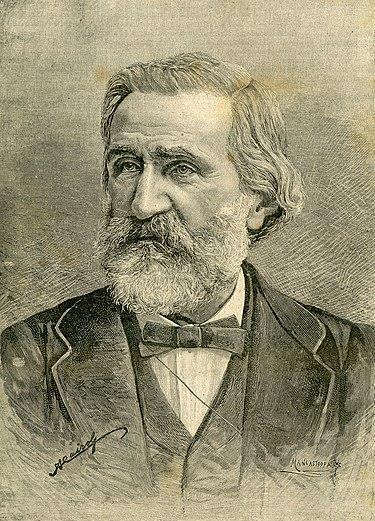

### Any suggestions by you?_death

#### **Igor Stravinsky**
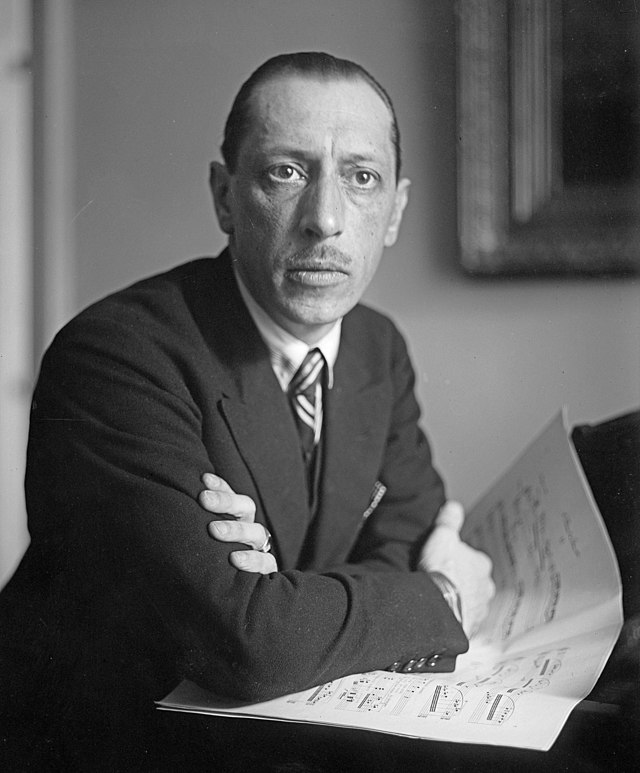

# 90,496/TSA1398198,Italian Concertos,2010,30073,Antonio Vivaldi,,,,Emi Classics,
```
a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "composer")
c = URIRef(ns1 + "Antonio_Vivaldi")
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "title")
c = Literal("Italian_Concertos", datatype = XSD.string) 
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "year")
c = Literal("2010", datatype = XSD.date)
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "duration")
c = Literal("30073", datatype = XSD.integer)
g2.add((a,b,c))

a = URIRef(ns1 + "496_TSA1398198")
b = URIRef(ns2 + "publisher")
c = URIRef(ns1 + "Emi_Classics") 
g2.add((a,b,c))ons by you?
```